# Image Classification with Convolutional Neural Network

CNNs are mostly used in the field of computer vision. CNNs treat images as images rather than just arrays of pixel values. They use convolution kernels to extract "features" from imagesm allowig them to recognize the shape of a cat's head or the outline of a dog's tail.

## Understanding CNNs

CNNs contain one or more sets of convolutional and pooling layers. Convolutional layers extract features from images, generating transformed images that are commonly referred to as feature maps. Pooling layers reduce the feature map's size by half so that features can be extracted at various resolutions and are less sensitive to small changes in position. The output from the final pooling layer is flattened  to one dimension and input to one or more dense layers for classification. The convolution and pooling layers are called bottleneck layers since they reduce the dimensionality of images input to them.

Convolutional layers extract features from images by passing convolution kernels over them. A kernel is simply a matrix of values. It usually measures 3 x 3, but it can be larger. To process an image, you place the kernel in the upper-left corner of the image, multiply the kernel values by the pixel values underneath, and compute a new value for the center pixel by summing the products. Then move the kernel one pixel to the right and repeat the process continuing row by row and column by column until the entire image has been processed.

A convolution layer doesn't use just one kernel to process images. It uses many sometimes 100 or more. The kernel values aren't determined ahead of time, they are initialized with random values and then learned (adjusted) as the CNN is trained, jsut as the weights connecting neurons in dense layers are learned. Each kernel also has a bias associated with it, just like a neuron in a dense layer.

Pooling layers downsample images to reduce their size. The most common resizing technique is max pooling which divides images into 2 x 2 blocks of pixels and selects the highest of the four values in each block. An alternative is average pooling which averages the values in each block.

Another way to downsize an image is to set the stride of convolutional layers to 2 instead of using pooling layers. Stride is the number of pixels a convolution kernel moves as it passes over an image. Setting it to 2 halves the image size by ignoring every other row and every other column of pixels.

Dense layers at the end of the network classify features extracted from the bottleneck layers and are referred to as the CNN's classification layers, they are the same as the multilayer perceptrons. For binary classification the output layer contains one neuron that uses the sigmoid activation function. For multiclass classification the output layer contains one neuron per class and uses the soft max activation function.

## Building CNNs using Keras

In [7]:
from tensorflow.keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                 │ (None, 26, 26, 32)       │           320 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)    │ (None, 13, 13, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)                 │ (None, 11, 11, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)    │ (None, 5, 5, 64)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten_4 (Flatten)               │ (None, 1600)             │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_8 (Dense)                   │ (None, 128)              │       204,928 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_9 (Dense)                   │ (None, 10)               │         1,290 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Each pooling layer reduces the image size by half and each convolution layer reduces the image height and width by two pixels. This is because the convolution kernel doesn't start with its senter cell over the pixel in the upper-left corner but its upper-left corner is aligned with the image's upper-left corner. For a 3 x 3 kernel that is 1 pixel border around the edges that don't survive the convolutin, for a 5 x 5 kernel that is 2 pixel wide border. The term for this is padding and it can be overwritten  by including a padding='same' parameter in the Conv2D.

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9991 - loss: 0.0025 - val_accuracy: 0.9923 - val_loss: 0.0407
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9904 - val_loss: 0.0545
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.9911 - val_loss: 0.0449
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9910 - val_loss: 0.0472
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9916 - val_loss: 0.0444
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9896 - val_loss: 0.0592
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9917 - val_loss: 0.0420
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9997 -

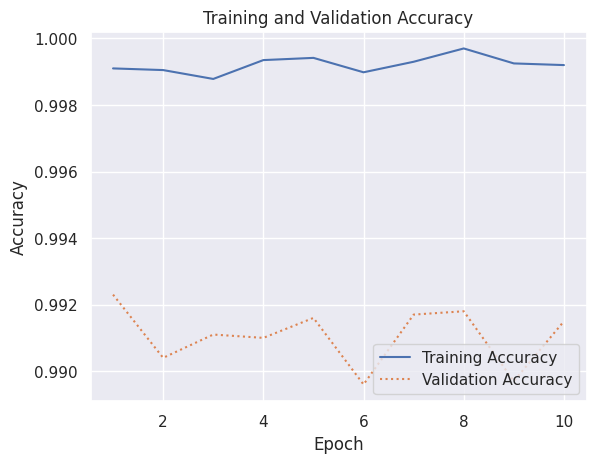

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Training a CNN to Recognize Artic Wildlife 